<a href="https://colab.research.google.com/github/AlexandrosMaragkakis/uni_ml_projects/blob/main/iris_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
iris = datasets.load_iris()
#print(iris.DESCR)

In [3]:
iris.data.shape
iris.target.shape
iris.target_names
iris.feature_names

print(f"Data shape: {iris.data.shape}")
print(f"Target shape: {iris.target.shape}")
print(f"Target names: {iris.target_names}")
print(f"Feature names: {iris.feature_names}")

Data shape: (150, 4)
Target shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
pd.set_option('display.precision', 2)

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
iris_df['species'].describe()

In [ ]:
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],
     hue='species')

In [5]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=7)


tree = DecisionTreeClassifier(criterion='entropy')

tree.fit(X=X_train, y=y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# precision recall and f1 produce different results each time
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
    
print('Results: ')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

Results: 
Accuracy: 0.9000
Precision: 0.9141
Recall: 0.9141
F1 score: 0.9130


[Text(0.4, 0.9, 'petal length (cm) <= 2.45\nentropy = 1.583\nsamples = 120\nvalue = [43, 38, 39]\nclass = setosa'),
 Text(0.2, 0.7, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(0.6, 0.7, 'petal width (cm) <= 1.7\nentropy = 1.0\nsamples = 77\nvalue = [0, 38, 39]\nclass = virginica'),
 Text(0.4, 0.5, 'petal length (cm) <= 5.0\nentropy = 0.286\nsamples = 40\nvalue = [0, 38, 2]\nclass = versicolor'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.6, 0.3, 'sepal length (cm) <= 6.05\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = virginica')]

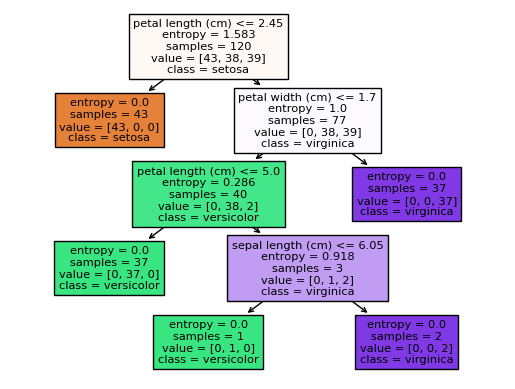

In [6]:
plot_tree(tree, feature_names=iris.feature_names,  class_names=iris.target_names, filled=True)

In [13]:
feature_importances = sorted(list(zip(tree.feature_importances_, iris.feature_names)), reverse = True)
print(feature_importances)

[(0.640477815794262, 'petal length (cm)'), (0.34501862026324126, 'petal width (cm)'), (0.014503563942496644, 'sepal length (cm)'), (0.0, 'sepal width (cm)')]


Text(0.5, 1.0, 'Feature Importance')

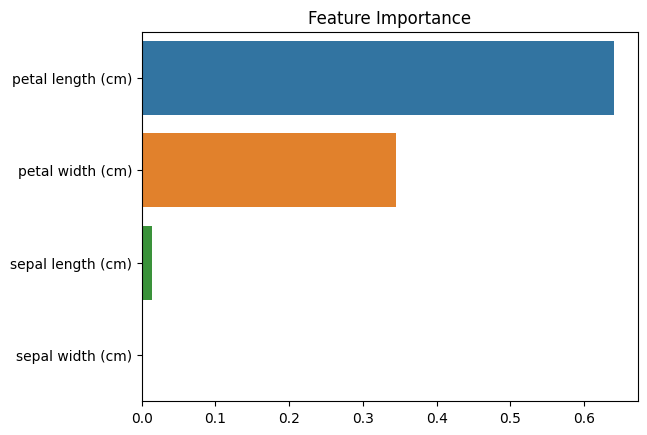

In [16]:
feature_importances = sorted(list(zip(tree.feature_importances_, iris.feature_names)), reverse = True)
x = [f[0] for f in feature_importances]
y_ = [f[1] for f in feature_importances]

sns.barplot(x=x,y=y_)
plt.title('Feature Importance')